## <h1><center><font color=darkgreen>Importing Libraries</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib as npl
from sklearn.feature_selection import RFE

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
npl.rcParams['figure.figsize']=(16,8)
npl.rcParams['axes.grid']=False

## <h1><center><font color=darkgreen>Exploratory Data Analysis(EDA)</font></center></h1>

In [3]:
df = pd.read_csv("leads.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a

In [4]:
#rearranging Columns
df = df[['Agent_id', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id', 'status']]
df

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...,LOST
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...,LOST
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,LOST
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...,LOST
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...,LOST
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a60232

In [5]:
df.shape

(46608, 15)

In [6]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...,LOST
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...,LOST
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,LOST
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...,LOST
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...,LOST
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...,LOST
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca8856781

In [7]:
# All columns in dataset
df.columns

Index(['Agent_id', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id', 'status'],
      dtype='object')

In [8]:
df.isnull().sum()

Agent_id              0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
status                0
dtype: int64

<AxesSubplot:title={'center':'Heatmap for null values'}>

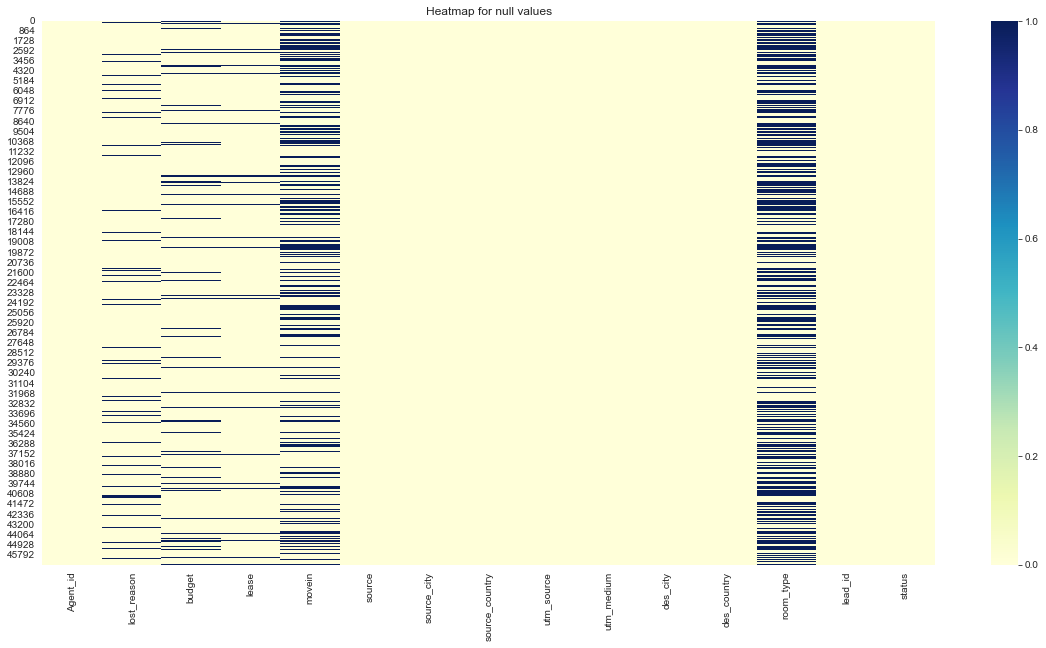

In [9]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values")
sns.heatmap(df.isnull(), cbar=True,cmap="YlGnBu") 

In [10]:
df.shape

(46608, 15)

Note:- <br>
Above heatmap shows null values in each column. We can see majority of null values in room type and movein section.

In [11]:
nullval = {'Column':['Agent_id', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id', 'status'],"Percentage of null":[round((df['Agent_id'].isnull().sum()/46317 *100),3),
round((df['lost_reason'].isnull().sum()/46608 *100),3),
round((df['budget'].isnull().sum()/46608 *100),3),
round((df['lease'].isnull().sum()/46608 *100),3),
round((df['movein'].isnull().sum()/46608 *100),3),
round((df['source'].isnull().sum()/46608 *100),3),
round((df['source_city'].isnull().sum()/46608 *100),3),
round((df['source_country'].isnull().sum()/46608 *100),3),
round((df['utm_source'].isnull().sum()/46608 *100),3),
round((df['utm_medium'].isnull().sum()/46608 *100),3),
round((df['des_city'].isnull().sum()/46608 *100),3),
round((df['des_country'].isnull().sum()/46608 *100),3),
round((df['room_type'].isnull().sum()/46608 *100),3),
round((df['lead_id'].isnull().sum()/46608 *100),3),
round((df['status'].isnull().sum()/46608 *100),3)]
          }
nullvaldf = pd.DataFrame(nullval)
nullvaldf.sort_values(by="Percentage of null",ascending=True)

,Column,Percentage of null
0,Agent_id,0.000
5,source,0.000
6,source_city,0.000
7,source_country,0.000
8,utm_source,0.000
9,utm_medium,0.000
10,des_city,0.000
11,des_country,0.000
13,lead_id,0.000
14,status,0.000


Note:-<br>
Room type has the most number of null values i.e. 50% followed by Movein at 29%.

In [12]:
# Unique values in each column
print('Agent_id:',len(df["Agent_id"].unique()))
print('lost_reason:',len(df["lost_reason"].unique()))
print('budget:',len(df["budget"].unique()))
print('lease:',len(df["lease"].unique()))
print('movein:',len(df["movein"].unique()))
print('source:',len(df["source"].unique()))
print('source_city:',len(df["source_city"].unique()))
print('source_country:',len(df["source_country"].unique()))
print('utm_source:',len(df["utm_source"].unique()))
print('utm_medium:',len(df["utm_medium"].unique()))
print('des_city:',len(df["des_city"].unique()))
print('des_country:',len(df["des_country"].unique()))
print('room_type:',len(df["room_type"].unique()))
print('lead_id:',len(df["lead_id"].unique()))
print('status:',len(df["status"].unique()))

Agent_id: 120
lost_reason: 31
budget: 1858
lease: 312
movein: 478
source: 683
source_city: 4336
source_country: 186
utm_source: 35
utm_medium: 64
des_city: 220
des_country: 15
room_type: 6
lead_id: 30574
status: 6


In [13]:
# Dropping records other than WON or LOST
df = df.loc[df['status']  != 'OPPORTUNITY']
df = df.loc[df['status']  != 'CONTACTED']
df = df.loc[df['status']  != 'PROCESSING']
df = df.loc[df['status']  != 'IMPORTANT']
df.shape

(46317, 15)

Note:-<br>
The number of records dropped from 46608 to 46317 after removing unwanted leads

In [14]:
df.status.unique()  # As we can see only LOST and WON has been retained

array(['LOST', 'WON'], dtype=object)

In [15]:
df.status.value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [16]:
print("Percentage of LOST in dataset = ",43244/46317*100,"%")
print("Percentage of WON in dataset = ",3073/46317*100,"%")

Percentage of LOST in dataset =  93.36528704363408 %
Percentage of WON in dataset =  6.634712956365914 %


In [17]:
df.room_type.unique()

array([nan, 'Ensuite', 'Entire Place', 'Studio', 'Twin-Studio',
       'Non-Ensuite'], dtype=object)

In [18]:
df.room_type.value_counts()

Ensuite         12379
Studio           6316
Entire Place     4128
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [19]:
#imputing null values in lost_reason with mode of the same
df['lost_reason'] = df['lost_reason'].fillna(df['lost_reason'].mode()[0])
df

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...,LOST
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...,LOST
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,LOST
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...,LOST
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...,LOST
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a60232

In [20]:
df.lost_reason.value_counts()

Low availability                  11965
Not responding                     7827
Not interested                     6449
Low budget                         5505
Wants private accommodation        2781
Short stay                         2264
Not a student                      1518
Just Enquiring                     1263
Inadequate details                  827
Semester stay                       817
Booked with manager                 676
Junk lead                           629
Booked on campus accommodation      613
Supply issue                        538
No supply                           534
Not serving in that region          411
Repeat lead                         394
Booked with competitor              356
Not going to university             329
Distance issue                      219
Junk lead/ Just Enquiring           147
Lead issue                          127
Looking for admission                41
Didn't respond in time               35
Visa/admission denied                17


In [21]:
#dropping all null values in dataset
df = df.dropna().reset_index(drop=True)
df.status.value_counts()

LOST    21364
WON      1461
Name: status, dtype: int64

In [22]:
df.shape

(22825, 15)

In [23]:
df = df.drop_duplicates()
df[df.duplicated()] # no dupliactes found

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status


In [24]:
df

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
1,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
2,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...,LOST
3,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...,LOST
4,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22820,d119aab7bc5c0823d29df1fa368bc56a6f6e333fc680a2...,Wants private accommodation,£121 - £180 Per Week,Other,19/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...,LOST
22821,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4

In [25]:
df.budget.value_counts().head(20)

£60 - £120 Per week     9689
£121 - £180 Per Week    8823
£181 - £240 Per Week    2126
£241 - £300 Per week     703
> 300£ Per Week          686
200                       38
150                       36
250                       20
130                       19
160                       17
100                       17
£150 Per Week             16
140                       15
150/week                  15
180                       15
120                       14
£200 Per Week             13
£160 Per Week             12
170                       10
>150/week                  9
Name: budget, dtype: int64

In [26]:
#Keeping only top 5 most occuring budgets
df1 = df.loc[(df['budget'] == '£60 - £120 Per week') | (df['budget'] == '£121 - £180 Per Week') |  
             (df['budget'] == '£181 - £240 Per Week') |(df['budget'] == '£241 - £300 Per week') | 
             (df['budget'] == '> 300£ Per Week')]
df1

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
1,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
2,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...,LOST
3,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...,LOST
4,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22820,d119aab7bc5c0823d29df1fa368bc56a6f6e333fc680a2...,Wants private accommodation,£121 - £180 Per Week,Other,19/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...,LOST
22821,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4

Note:<br>
1. As seen on the website, we only found 5 types of budgets we deleted the rest as they lie somehwere within the given ranges and also it helps to reduce the number of encodings.
2. Also the count of other budgets was fairly low comparitively.

In [27]:
df1.lease.value_counts().head(20)

Full Year Course Stay 40 - 44 weeks           10288
Complete Education Year Stay 50 - 52 weeks     5921
Semester Stay 20 - 24 weeks                    2494
Summer/Short Stay 8 - 12 weeks                 2027
Other                                           862
51 weeks                                        100
51                                               85
44 weeks                                         48
44                                               21
40 - 44 weeks                                    19
1 year                                           15
50 - 52 weeks                                    13
full year stay                                   11
4 weeks                                           5
12 weeks                                          5
20 - 24 weeks                                     5
1 year .                                          4
51 week                                           4
12                                                4
6 months    

Note:-<br>
Similar to the budget, we  classified the lease times into 5 major categories, rest others were considered under the "Other" Category.

In [28]:
#splitting into first 4 categories
first4 = df1.loc[(df1['lease'] == 'Full Year Course Stay 40 - 44 weeks') | (df1['lease'] == 'Complete Education Year Stay 50 - 52 weeks') |  
             (df1['lease'] == 'Semester Stay 20 - 24 weeks') |(df1['lease'] == 'Summer/Short Stay 8 - 12 weeks')] 
first4

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
2,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...,LOST
3,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...,LOST
4,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...,LOST
6,f1ece3b02f1e5989bb0918e468fbc3f3e60d74ed90809d...,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,09/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,2cd7b7d56d59bc36ed44f22abb293587e6c7ec3708facc...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,4c354049e888947c11126b053b3bb9b880e2fddc456463...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22819,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low availability,£60 - £120 Per week,Semester Stay 20 - 24 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,42e535be8863a0253115744dca757cddddfc2f626df4f8...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,085c3a49a31cbfa71c36746a98dc908d30d423a63b969c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,86ae1d25e92121dd581c75c958103bb3cc81ef4aa47fef...,LOST
22821,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a651

In [29]:
first4.lease.value_counts()

Full Year Course Stay 40 - 44 weeks           10288
Complete Education Year Stay 50 - 52 weeks     5921
Semester Stay 20 - 24 weeks                    2494
Summer/Short Stay 8 - 12 weeks                 2027
Name: lease, dtype: int64

In [30]:
#combining rest other categories in lease
other = df1.loc[(df1['lease'] != 'Full Year Course Stay 40 - 44 weeks') & (df1['lease'] != 'Complete Education Year Stay 50 - 52 weeks') &  
             (df1['lease'] != 'Semester Stay 20 - 24 weeks') &(df1['lease'] != 'Summer/Short Stay 8 - 12 weeks')] 
other

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
1,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,LOST
5,f1ece3b02f1e5989bb0918e468fbc3f3e60d74ed90809d...,Wants private accommodation,£60 - £120 Per week,Other,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b384863fa1f6e091164b74219726eee0b9dd47776b91a4...,e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...,LOST
17,95d245f3eb25eb695e980c0591c16a4c818e609cd2aac2...,Just Enquiring,£60 - £120 Per week,Other,06/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,38b85524e5161ad414784edca30dc35b5e422910d15e7a...,LOST
33,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,Low budget,£60 - £120 Per week,Other,16/07/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,282f96b099630502f8bb5033849c69982dd14701585306...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ea58dc05b968545d016953b84130933e920097afbf3443...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,0d40ac22649ec447d7c4aa4a430fe13ed8a76b523b8e6e...,LOST
39,18177338c3669a1314d644b7f4ecfd18a5c735e819edf1...,Not interested,£181 - £240 Per Week,51 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,a942ac61e5904001ce2c9276debd89c03a93c0e2f84e78...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1c42ebd1f17c7950d61e4db4bd277d0ec8472f575cad98...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,Low availability,£60 - £120 Per week,Other,17/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9a16d664dd12c980f570d0fdf9d69653975e75e3b733b7...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,3e18100303148b030b7c306581ee852d9a105a6018ae8f...,LOST
22778,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Short stay,£60 - £120 Per week,Other,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,42e535be8863a0253115744dca757cddddfc2f626df4f8...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,085c3a49a31cbfa71c36746a98dc908d30d423a63b969c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,e1c453c3b1a82ce4950877c372da1365f68e1535ed57c3...,LOST
22793,25b99b9c636ea2d7820f5409c19248e08e87e59d0fb42c...,Not responding,£121 - £180 Per Week,Other,20/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f

In [31]:
other["lease"] = "Other"
other.lease.value_counts()

Other    1297
Name: lease, dtype: int64

In [32]:
df_final = pd.concat([first4, other])
df_final = df_final.sample(frac = 1)
df_final

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
5630,25b99b9c636ea2d7820f5409c19248e08e87e59d0fb42c...,Not interested,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,99f9bdc608425996877a3b7c21c2d71777cc5335e2e2d3...,LOST
16966,18177338c3669a1314d644b7f4ecfd18a5c735e819edf1...,Not interested,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,21/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,faf3f24bd5f1c96fdba9d7becf5ddaddbd4771873c9430...,LOST
8703,fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f1...,Just Enquiring,£60 - £120 Per week,Other,05/01/24,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,72af295cca73cd8934fdc81340a40868eb1390eb133245...,38fe804a1f9ec032ad876bd7192c1f706e1402831e163c...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,560fd0244d45db32b00b7ef265ffaba198313959d65474...,LOST
17184,18177338c3669a1314d644b7f4ecfd18a5c735e819edf1...,Not interested,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,2b93c397c8f2cabaf5796ce87553bd6bd3e506261a6a5e...,416e5dcb8f5014e690426512e5952652d1c6a3e98a0c47...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,9d63eb2264792ff34cce9f7e00654ad1f6125ea6cec99e...,LOST
8593,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,Low availability,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,03/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,5e02dadaa7e4cd29809e2f8a115f1e5e9c01b29813a1fb...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,f9e285b4b158291292f639be3f1a5479d9bc85e756e65b...,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low availability,£121 - £180 Per Week,Semester Stay 20 - 24 weeks,01/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,6d6716b2ea2c105ca07dd0f1d28eb4cbfa5e8db1059ebf...,f24b3e6d69d95512e334bc1cd7d3a80dcd8ffd151c14e9...,d15690f08a575024650b01ffac892cfd2b93e6c57c140f...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,085c3a49a31cbfa71c36746a98dc908d30d423a63b969c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,2f2ceab99b44004e477d230eac9cc8d302e4faa639b67b...,LOST
11358,9ab9b659a836589f715b72165b0d32cad846412e62851c...,Not interested,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,fcd45baf9d4366ec47bbb42

Note:-<br>
df_final is the final dataset after cleansing and imputation which will be considered for model building. 

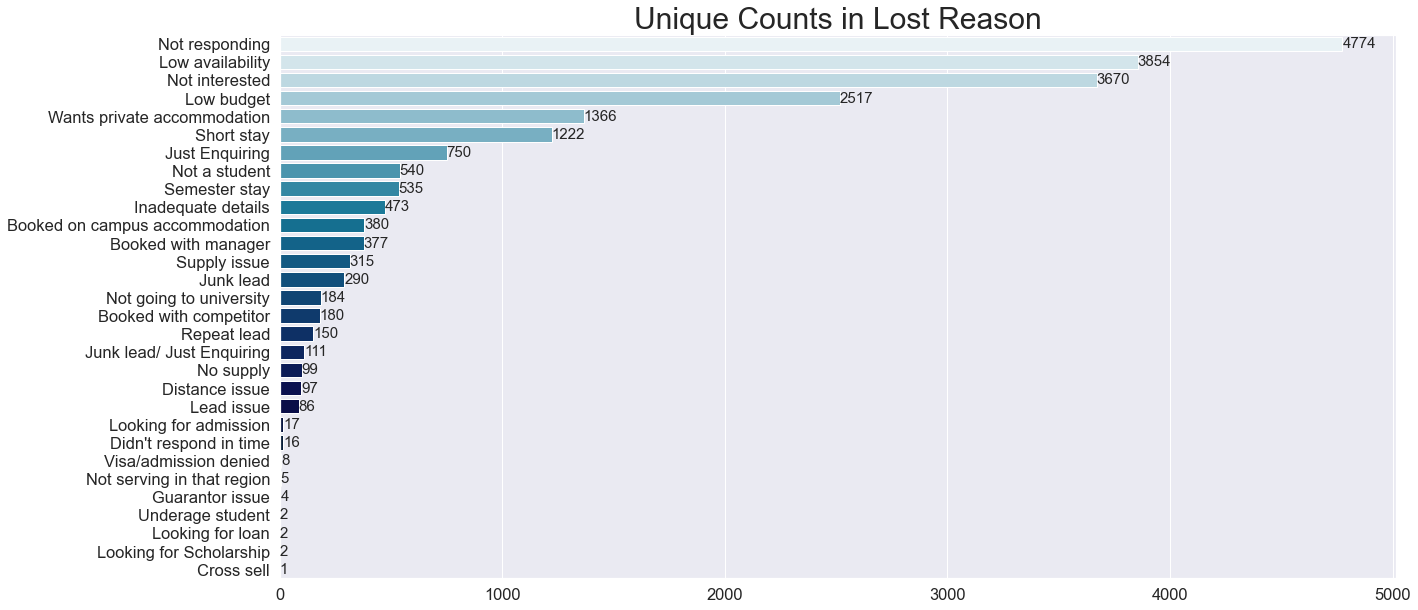

In [33]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_final,x=df_final["lost_reason"].value_counts().values,y=df_final["lost_reason"].value_counts().index,palette="ocean_r")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Unique Counts in Lost Reason",fontsize = 30)
plt.show()

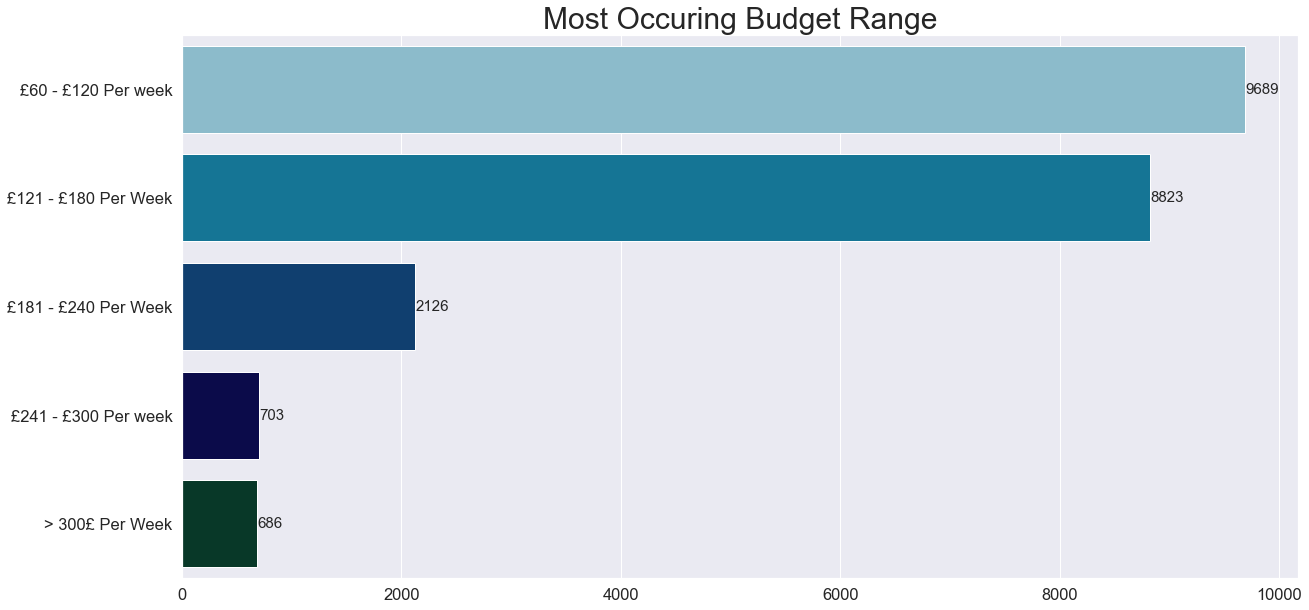

In [34]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_final,x=df_final["budget"].value_counts().values,y=df_final["budget"].value_counts().index,palette="ocean_r")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Most Occuring Budget Range",fontsize = 30)
plt.show()

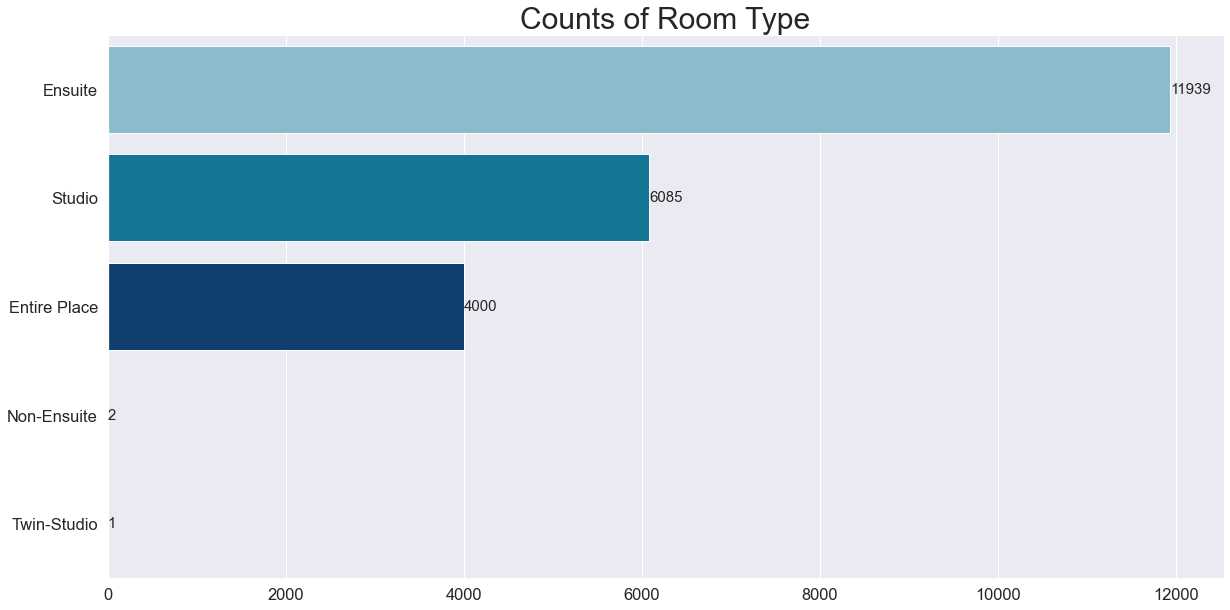

In [35]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_final,x=df_final["room_type"].value_counts().values,y=df_final["room_type"].value_counts().index,palette="ocean_r")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Counts of Room Type",fontsize = 30)
plt.show()

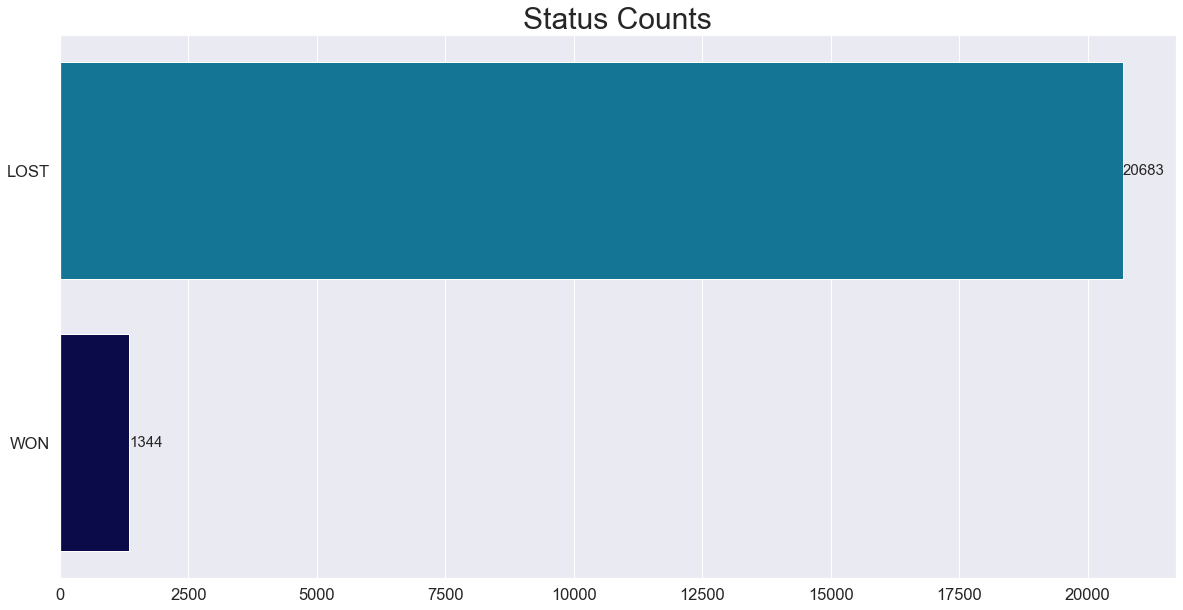

In [36]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_final,x=df_final["status"].value_counts().values,y=df_final["status"].value_counts().index,palette="ocean_r")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Status Counts",fontsize = 30)
plt.show()

## <h1><center><font color=darkgreen>Label Encoding</font></center></h1>

In [37]:
from sklearn.preprocessing import LabelEncoder
df_final["Agent_id"] = LabelEncoder().fit_transform(df_final["Agent_id"])
df_final["lost_reason"] = LabelEncoder().fit_transform(df_final["lost_reason"])
df_final["budget"] = LabelEncoder().fit_transform(df_final["budget"])
df_final["lease"] = LabelEncoder().fit_transform(df_final["lease"])
df_final["movein"] = LabelEncoder().fit_transform(df_final["movein"])
df_final["source"] = LabelEncoder().fit_transform(df_final["source"])
df_final["source_city"] = LabelEncoder().fit_transform(df_final["source_city"])
df_final["source_country"] = LabelEncoder().fit_transform(df_final["source_country"])
df_final["utm_source"] = LabelEncoder().fit_transform(df_final["utm_source"])
df_final["utm_medium"] = LabelEncoder().fit_transform(df_final["utm_medium"])
df_final["des_city"] = LabelEncoder().fit_transform(df_final["des_city"])
df_final["des_country"] = LabelEncoder().fit_transform(df_final["des_country"])
df_final["room_type"] = LabelEncoder().fit_transform(df_final["room_type"])
df_final["lead_id"] = LabelEncoder().fit_transform(df_final["lead_id"])
df_final["status"] = LabelEncoder().fit_transform(df_final["status"])

In [38]:
df_final.head()

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,status
5630,16,20,4,0,386,0,1420,90,9,1,58,1,0,11003,0
16966,9,20,1,1,265,0,1839,90,9,1,40,1,0,17892,0
8703,102,10,4,2,61,0,1325,26,9,1,40,1,0,6169,0
17184,9,20,1,0,254,0,465,35,9,1,50,1,0,11279,0
8593,20,15,2,1,39,0,1497,148,9,1,30,1,3,17819,0


In [39]:
# Splitting data into X,Y.
X = df_final.drop(["status"],axis = 1)
Y = df_final.iloc[:,-1]

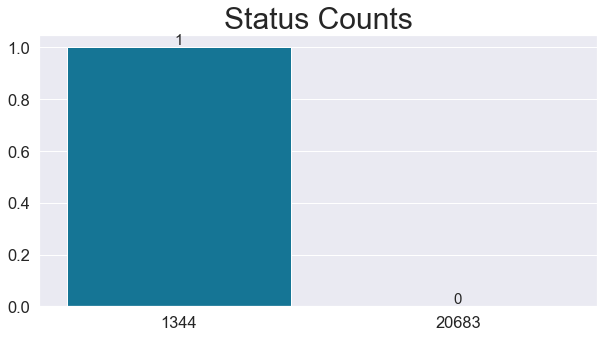

In [40]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_final,x=df_final["status"].value_counts().values,y=df_final["status"].value_counts().index,palette="ocean_r")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Status Counts",fontsize = 30)
plt.show()

Inference:- <br> As we can see data is imbalanced from above graph.

In [41]:
# Balancing Data
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(X, Y)
pd.Series(y_ros).value_counts()

0    20683
1    20683
Name: status, dtype: int64

## <h1><center><font color=darkgreen>Feature Elimination using Recursive Feature Elimination (RFE)</font></center></h1>

In [42]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,n_features_to_select=5).fit(X, Y)

In [43]:
# Feature Ranking:
fit.ranking_

array([ 7,  1,  2,  1,  6,  1,  9,  8,  1,  3,  5,  1,  4, 10])

In [44]:
X.columns

Index(['Agent_id', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [45]:
rank = {'Column':['Agent_id', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id',],"Rankings":fit.ranking_}
rankings= pd.DataFrame(rank)
rankings.sort_values(by='Rankings',ascending=False)

,Column,Rankings
13,lead_id,10
6,source_city,9
7,source_country,8
0,Agent_id,7
4,movein,6
10,des_city,5
12,room_type,4
9,utm_medium,3
2,budget,2
1,lost_reason,1


Note:-<Br>
    Dropping last 5 features rankingwise i.e lead_id, source_city, source_country, agent_id and movein.

In [46]:
df_final = df_final.drop(["lead_id","source_city","source_country","Agent_id","movein"],axis= 1)
df_final 

,lost_reason,budget,lease,source,utm_source,utm_medium,des_city,des_country,room_type,status
5630,20,4,0,0,9,1,58,1,0,0
16966,20,1,1,0,9,1,40,1,0,0
8703,10,4,2,0,9,1,40,1,0,0
17184,20,1,0,0,9,1,50,1,0,0
8593,15,2,1,0,9,1,30,1,3,0
...,...,...,...,...,...,...,...,...,...,...
12665,15,1,3,0,11,7,2,1,0,0
11358,20,1,1,0,9,1,28,1,0,0
16203,16,2,1,0,9,1,67,1,0,0
13883,29,1,1,0,9,1,65,1,0,0


In [47]:
X = df_final 
Y = Y

## <h1><center><font color=darkgreen>Splitting Data Into Test Train</font></center></h1>

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## <h1><center><font color=darkgreen>Model Building</font></center></h1>

In [49]:
models = [ LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC , KNeighborsClassifier, GaussianNB]
accuracy = []
precision = []
recall = []
f1 = []

for model in models:
    Mod = model().fit(X_train,Y_train)
    pred = Mod.predict(X_test)
    accuracy.append(accuracy_score(Y_test, pred))
    precision.append(precision_score(Y_test, pred))
    recall.append(recall_score(Y_test, pred))
    f1.append(f1_score(Y_test, pred))  

In [50]:
# create a new DataFrame from the above lists

MLModels_df = pd.DataFrame({"Models": [ "LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier","SVC" , "KNeighborsClassifier", "GaussianNB"],
                           "Accuracy": accuracy,
                           "Precision": precision,
                           "Recall": recall,
                           "F1": f1}).sort_values(by=[ "Accuracy"], ascending=False)

MLModels_df.set_index('Models', inplace=True)
MLModels_df

,Accuracy,Precision,Recall,F1
Models,,,,
LogisticRegression,1.000000,1.000000,1.000000,1.000000
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
GaussianNB,1.000000,1.000000,1.000000,1.000000
KNeighborsClassifier,0.982146,0.868354,0.838631,0.853234
SVC,0.938115,0.000000,0.000000,0.000000
